In [2]:
import numpy as np
from scipy.signal import lfilter
import matplotlib.pyplot as plt
from dsp import matched_filter, add_distort_noise
from Dataset import load_scg

In [3]:
signals_clean, labels_clean, duration, fs = load_scg(0, 'train')
signal = signals_clean[0]
sampling_rate = fs

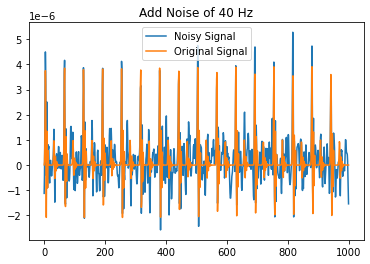

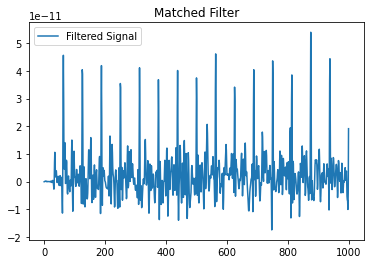

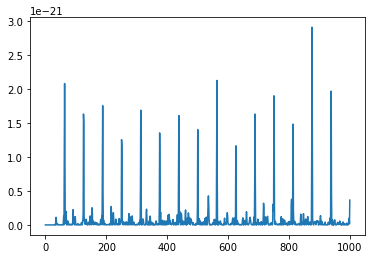

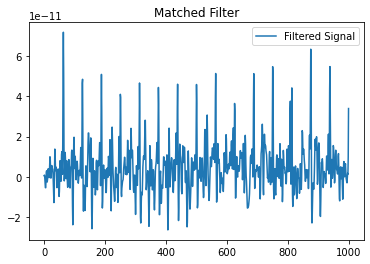

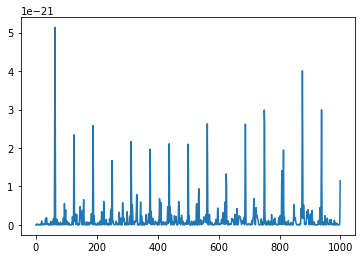

In [4]:
# construct Data for matched filter
# the amplitude of 40Hh noise is very large
signal_with_40Hz_Noise_ = add_distort_noise(signal, n_samples=1000, sampling_rate=100,noise_frequency=40, noise_amplitude=0.8, show=True)

# if we could get a clean template as the input of Matched Filter
clean_template = signal[:64]
filtered_signal_10_1 = matched_filter(signal_with_40Hz_Noise_, clean_template, show=True)
# The pronounced peaks in the output of Matched Filter indicates the likelihood of a signal match

# We can make it more prominent by squaring the filtered signal.
plt.plot(np.square(filtered_signal_10_1))
plt.show()

# Take a noisy template as the input of Matched Filter
noisy_template = signal_with_40Hz_Noise_[:64]
filtered_signal_10_2 = matched_filter(signal_with_40Hz_Noise_, noisy_template, show=True)
plt.plot(np.square(filtered_signal_10_2))
plt.show()

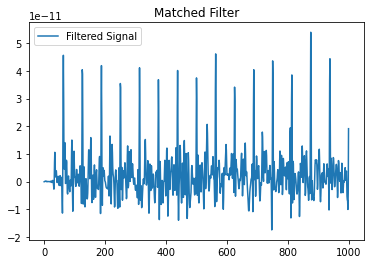

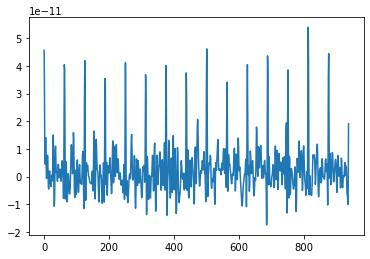

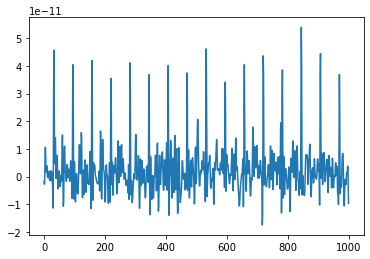

In [18]:
delay = (len(clean_template) - 1)
filtered_signal_10_1 = matched_filter(signal_with_40Hz_Noise_, clean_template, show=True)
plt.plot(filtered_signal_10_1[delay:])
plt.show()

convolved_signal = np.convolve(signal_with_40Hz_Noise_, clean_template[::-1], mode='same')
plt.plot(convolved_signal)

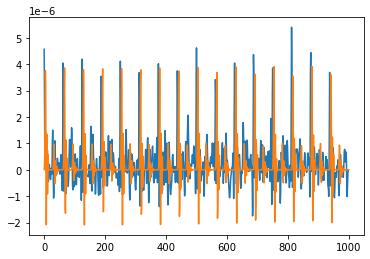

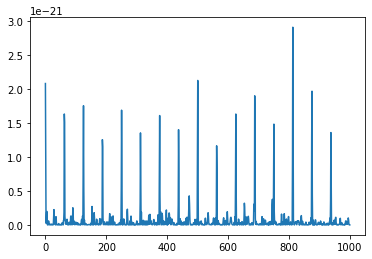

In [22]:
convolved_signal = np.convolve(signal_with_40Hz_Noise_, clean_template[::-1], mode='full')
plt.plot(convolved_signal[delay:] * 1e5)
plt.plot(signal)
plt.show()

plt.plot(np.square(convolved_signal[delay:]))
# plt.plot(filtered_signal_10_1)

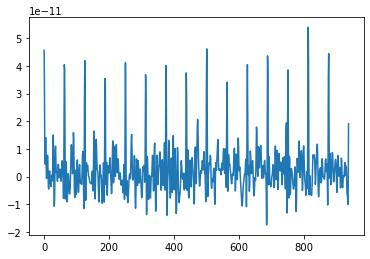

In [17]:

convolved_signal = np.convolve(signal_with_40Hz_Noise_, clean_template[::-1], mode='valid')
plt.plot(convolved_signal)